## Waste Management using CNN Model

In [2]:
!where python

d:\Softwares\Python 3.10\python.exe
D:\Softwares\Python\python.exe
C:\Users\syedh\AppData\Local\Microsoft\WindowsApps\python.exe


In [4]:
pip install opencv-python


   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   - -------------------------------------- 1.0/39.5 MB 4.2 MB/s eta 0:00:10
   - -------------------------------------- 1.6/39.5 MB 4.2 MB/s eta 0:00:10
   -- ------------------------------------- 2.4/39.5 MB 4.0 MB/s eta 0:00:10
   --- ------------------------------------ 3.4/39.5 MB 3.8 MB/s eta 0:00:10
   --- ------------------------------------ 3.9/39.5 MB 3.7 MB/s eta 0:00:10
   ----- ---------------------------------- 5.0/39.5 MB 3.8 MB/s eta 0:00:10
   ----- ---------------------------------- 5.8/39.5 MB 3.8 MB/s eta 0:00:09
   ------ --------------------------------- 6.3/39.5 MB 3.7 MB/s eta 0:00:09
   ------- -------------------------------- 7.1/39.5 MB 3.8 MB/s eta 0:00:09
   ------- -------------------------------- 7.9/39.5 MB 3.8 MB/s eta 0:00:09
   -------- ------------------------------- 8.7/39.5 MB 3.8 MB/s eta 0:00:09
   --------- ------------------------------ 9.4/39.5 MB 3.8 MB/s eta 0:00:08
   --

In [3]:
pip install tensorflow

     -------------------------------------- 390.0/390.0 MB 2.0 MB/s eta 0:00:00
     -------------------------------------- 133.7/133.7 kB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 71.9/71.9 kB 4.1 MB/s eta 0:00:00
     -------------------------------------- 126.6/126.6 kB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 64.9/64.9 kB ? eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 26.4/26.4 MB 3.2 MB/s eta 0:00:00
     -------------------------------------- 434.5/434.5 kB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 4.3/4.3 M


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [5]:
!python --version

Python 3.10.9


In [7]:
!pip install pandas

     ---------------------------------------- 11.6/11.6 MB 3.6 MB/s eta 0:00:00
     -------------------------------------- 508.0/508.0 kB 8.0 MB/s eta 0:00:00
     -------------------------------------- 346.8/346.8 kB 7.2 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
!pip install matplotlib


     ---------------------------------------- 8.0/8.0 MB 3.7 MB/s eta 0:00:00
     -------------------------------------- 107.7/107.7 kB 6.1 MB/s eta 0:00:00
     ---------------------------------------- 71.9/71.9 kB ? eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 3.8 MB/s eta 0:00:00
     -------------------------------------- 218.6/218.6 kB 6.7 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
!pip install opencv-python

     ---------------------------------------- 39.5/39.5 MB 3.4 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
!pip install tqdm


     ---------------------------------------- 78.5/78.5 kB 4.3 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [6]:
train_path="D:/SAFI/upes/Sem8/edunet internship/Waste Classification/dataset/TRAIN"
test_path="D:/SAFI/upes/Sem8/edunet internship/Waste Classification/dataset/TEST"

In [4]:
#import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [7]:
#Visualization
x_data=[]
y_data=[]
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data=pd.DataFrame({'image':x_data,'label':y_data})

100%|██████████| 9999/9999 [00:11<00:00, 899.68it/s] 


In [8]:
data.shape

(22564, 2)

([<matplotlib.patches.Wedge at 0x230daa4fa60>,
 [Text(-1.131700766397965, -0.20433642684127334, 'Organic'),
  Text(1.1317007485343022, 0.20433652577769967, 'Recyclable')],
 [Text(-0.6396569549205888, -0.11549450212767623, '55.69%'),
  Text(0.6396569448237359, 0.11549455804826503, '44.31%')])

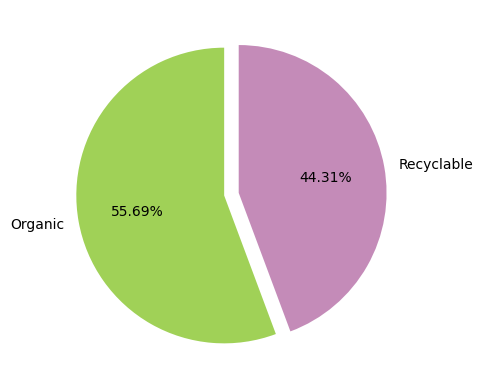

In [9]:
colors=['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic','Recyclable'], autopct='%0.2f%%', colors=colors, startangle=90, explode=[0.05,0.05])

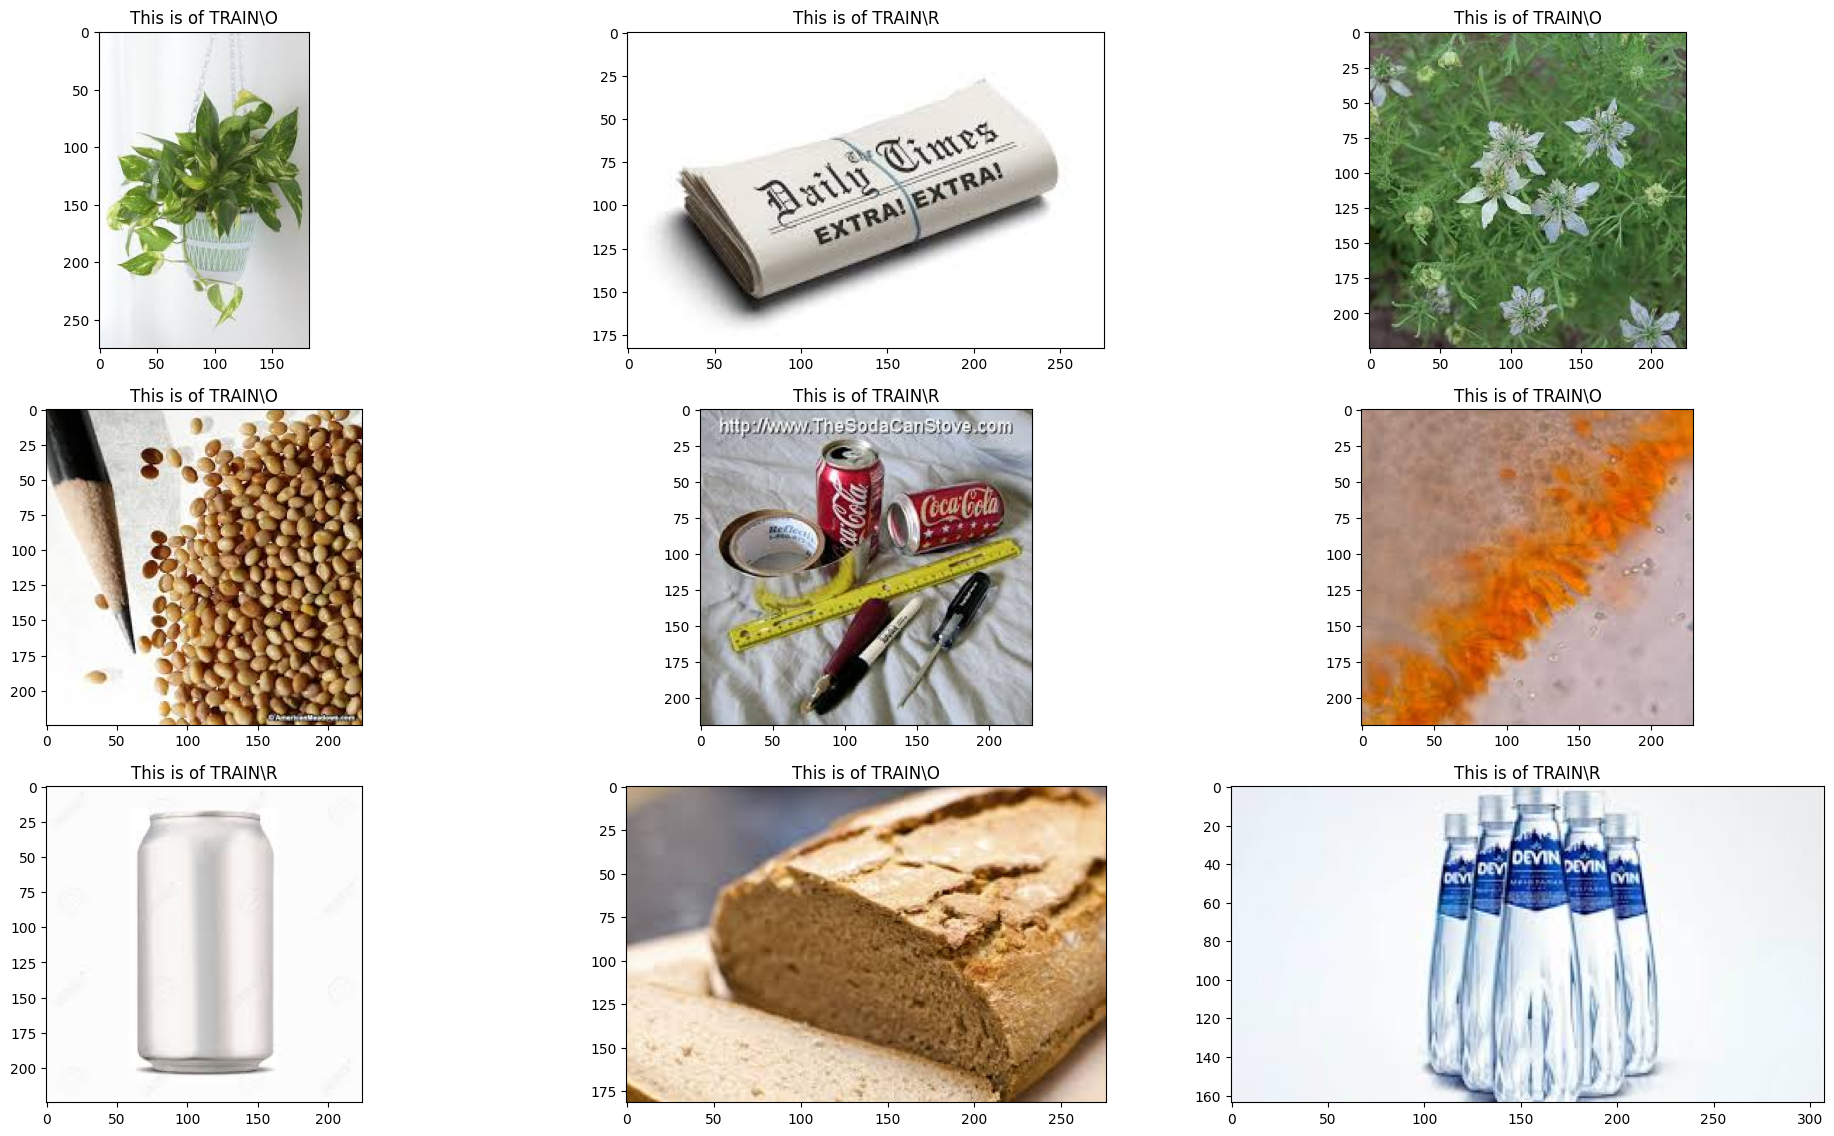

In [10]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

## CNN - Convolution Neural Network

In [16]:
model= Sequential()
model.add(Conv2D(32,(3,3),input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])
batch_size=256

In [17]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
train_datagen=ImageDataGenerator(rescale=1./255)

In [19]:
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical")

test_generator=test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical")

## "The model training was stopped manually due to excessive runtime and computational constraints. Further optimizations or alternative approaches will be explored to improve efficiency."

In [22]:
hist=model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 3329s 37s/step - accuracy: 0.7278 - loss: 0.5522 - val_accuracy: 0.8754 - val_loss: 0.3641
Epoch 2/10
14/89 ━━━━━━━━━━━━━━━━━━━━ 51:20 41s/step - accuracy: 0.8231 - loss: 0.4353

KeyboardInterrupt: 